<font face = "Arial" size = "5"> Coronaviruses are a group of RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.
    
   <br>Data Sources</br>

   <br>Mobility Data <a href='https://www.apple.com/covid19/mobility'>Apple</a>
   <br>Coronavirus Cases Data <a href='https://github.com/CSSEGISandData/COVID-19'>Johns Hopkins University</a>
   </font>
   <center><img src= 'https://upload.wikimedia.org/wikipedia/commons/8/82/SARS-CoV-2_without_background.png' width = "500" height = "500">

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Import Data from csv files

In [2]:
latest_df  = pd.read_csv("latest.csv")
death_df = pd.read_csv("death.csv")
confirmed_df = pd.read_csv("confirmed.csv")
recoveries_df = pd.read_csv("recoveries.csv")
us_medical_data_df = pd.read_csv("us_medical_data.csv")

In [3]:
latest_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-19 04:22:56,33.93911,67.709953,38883,1437,32576,4870.0,Afghanistan,99.883527,3.695702
1,NaN,NaN,NaN,Albania,2020-09-19 04:22:56,41.15330,20.168300,12073,353,6831,4889.0,Albania,419.521857,2.923880
2,NaN,NaN,NaN,Algeria,2020-09-19 04:22:56,28.03390,1.659600,49413,1659,34818,12936.0,Algeria,112.683751,3.357416
3,NaN,NaN,NaN,Andorra,2020-09-19 04:22:56,42.50630,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,NaN,NaN,Angola,2020-09-19 04:22:56,-11.20270,17.873900,3848,147,1443,2258.0,Angola,11.708053,3.820166


In [4]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,324,327,330,334,338,340,343,347,353,358
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,130,131,132,134,136,139,143,144,147,147


In [5]:
us_medical_data_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-09-19 04:30:26,32.3182,-86.9023,142863,2428,61232.0,79203.0,1.0,2913.677538,1039010.0,NaN,1.699530,84000001,USA,21190.511882,NaN
1,Alaska,US,2020-09-19 04:30:26,61.3707,-152.4044,6644,45,2422.0,4177.0,2.0,908.214806,418293.0,NaN,0.677303,84000002,USA,57179.394296,NaN
2,American Samoa,US,2020-09-19 04:30:26,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1571.0,NaN,NaN,16,ASM,2823.457522,NaN
3,Arizona,US,2020-09-19 04:30:26,33.7298,-111.4312,212942,5451,33526.0,173965.0,4.0,2925.543059,1362319.0,NaN,2.559852,84000004,USA,18716.471598,NaN
4,Arkansas,US,2020-09-19 04:30:26,34.9697,-92.3731,74082,1173,64145.0,8764.0,5.0,2454.831394,866435.0,NaN,1.583381,84000005,USA,28710.777771,NaN


In [6]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901


Remove undesired columns from the data

In [7]:
columns = confirmed_df.keys()
death = death_df.loc[:, columns[4]:columns[-1]]
confirmed = confirmed_df.loc[:, columns[4]:columns[-1]]
recoveries = recoveries_df.loc[:, columns[4]:columns[-1]]

In [8]:
dates = confirmed.keys()
world_cases = []
world_deaths = []
world_recovered = []
world_active = []
mortality_rate = []

for i in dates:
    world_cases.append(confirmed[i].sum())
    world_deaths.append(death[i].sum())
    world_recovered.append(recoveries[i].sum())
    world_active.append(world_cases[-1] - (world_deaths[-1] + world_recovered[-1]))
    mortality_rate.append(world_deaths[-1]/world_cases[-1])

Daily Increase

In [9]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i==0:
            d.append(data[i])
        else:
            d.append(data[i] - data[i-1])
    return d

Moving Average

In [10]:
def moving_average(data, window = 5):
    d = []
    for i in range(len(data)):
        if i<window:
            d.append(sum(data[0:i])/(i+1))
        else:
            d.append(sum(data[i-window:i])/window)
    return d

In [11]:
window = 7
daily_world_cases_increase = daily_increase(world_cases)
daily_world_deaths_increase = daily_increase(world_deaths)
daily_world_recovered_increase = daily_increase(world_recovered)
daily_world_active_increase = daily_increase(world_active)

In [12]:
world_cases_average = moving_average(world_cases, window)
daily_world_cases_increase_average = moving_average(daily_world_cases_increase)

world_deaths_average = moving_average(world_deaths, window)
daily_world_deaths_increase_average = moving_average(daily_world_deaths_increase, window)

world_recovered_average = moving_average(world_recovered, window)
daily_world_recovered_increase_average = moving_average(daily_world_recovered_increase, window)

world_active_average = moving_average(world_active)
daily_world_active_increase_average = moving_average(daily_world_active_increase) 

Future Forecasting

In [13]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)

world_cases  = np.array(world_cases).reshape(-1, 1)
world_deaths = np.array(world_deaths).reshape(-1, 1)
world_recovered = np.array(world_recovered).reshape(-1, 1)

In [14]:
start_date = '1/22/2020'
start = datetime.datetime.strptime(start_date, "%m/%d/%Y")
future_days = 10
future_forecast = [(start+datetime.timedelta(days = i)).strftime("%m/%d/%Y") for i in range(len(days_since_1_22)+future_days)]

Model Training 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(days_since_1_22[50:], world_cases[50:], test_size = 0.05, shuffle = False)

In [16]:
#Transform Data For Polynomial Regression

poly_features = PolynomialFeatures(degree = 5)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

In [17]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {
    'tol':tol, 'alpha_1':alpha_1, 'alpha_2':alpha_2, 'lambda_1':lambda_1,
    'lambda_2':lambda_2, 'normalize':normalize
                }

bayesian = BayesianRidge(fit_intercept = False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
bayesian_search.fit(X_train_poly, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                  

In [18]:
bayesian_search.best_params_

{'tol': 0.01,
 'normalize': False,
 'lambda_2': 0.001,
 'lambda_1': 1e-07,
 'alpha_2': 0.001,
 'alpha_1': 0.001}

In [19]:
bayesian_best = bayesian_search.best_estimator_

#Model Prediction
predicted = bayesian_best.predict(X_test_poly)

print("mean absolute error", mean_absolute_error(predicted, y_test))
print("mean squared error", mean_squared_error(predicted, y_test))

mean absolute error 646752.1950884822
mean squared error 434489582877.2755


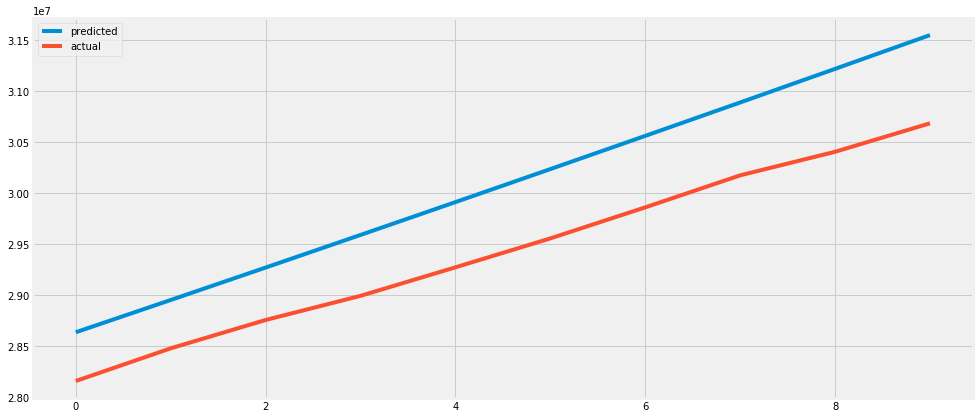

In [20]:
plt.figure(figsize = (15, 7))
plt.plot(predicted)
plt.plot(y_test)
plt.legend(['predicted', 'actual'])
plt.show()

#  Graphing the number of Confirmed Cases, Active Cases, Deaths, Recoveries, Mortality Rate and Recovery Rate

In [21]:
days_since_1_22 = days_since_1_22.reshape(1, -1)[0]

world_cases = world_cases.reshape(1, -1)[0]
world_cases_average = np.array(world_cases_average).reshape(1, -1)[0]

world_deaths = world_deaths.reshape(1, -1)[0]
world_deaths_average = np.array(world_deaths_average).reshape(1, -1)[0]

world_recovered = world_recovered.reshape(1, -1)[0]
world_recovered_average = np.array(world_recovered_average).reshape(1, -1)[0]

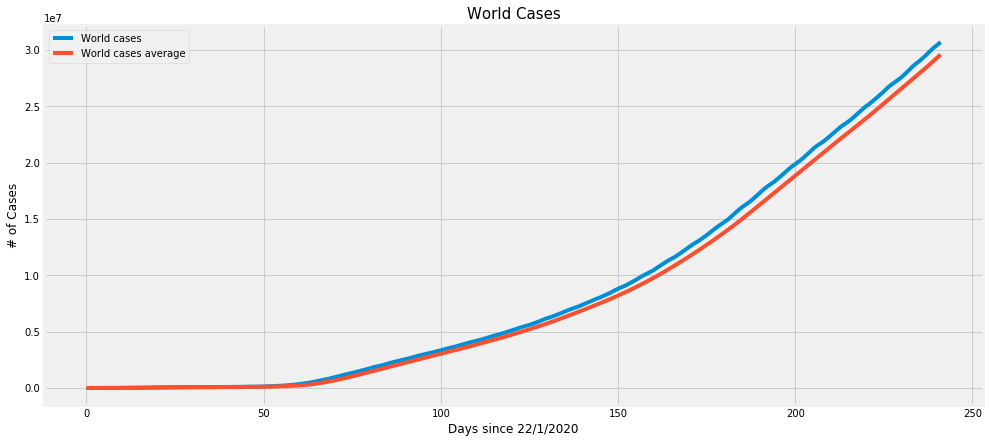

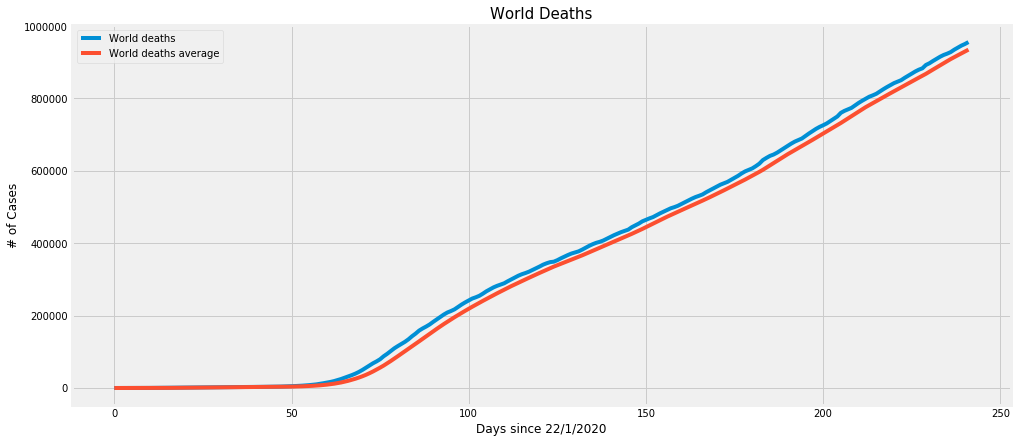

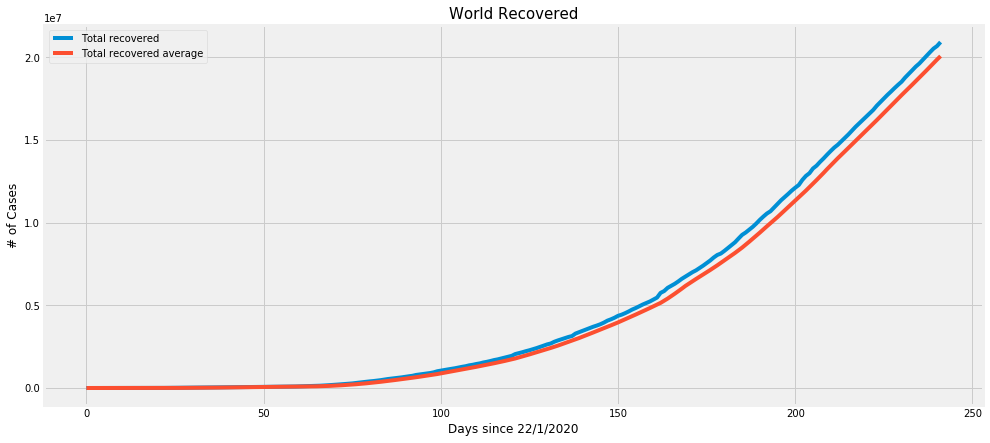

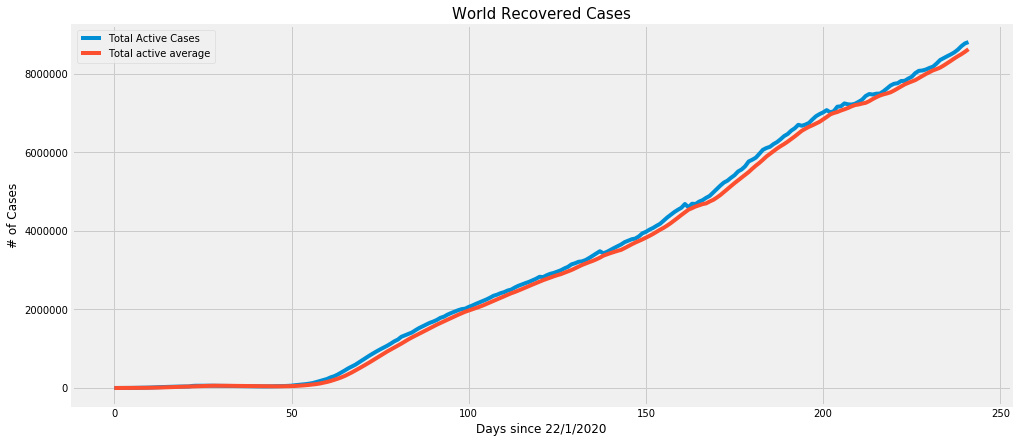

In [22]:
plt.figure(figsize = (15, 7))
plt.plot(days_since_1_22, world_cases)
plt.plot(days_since_1_22, world_cases_average)
plt.xlabel('Days since 22/1/2020')
plt.ylabel('# of Cases')
plt.title('World Cases', size = 15)
plt.legend(['World cases', 'World cases average'])
plt.show()

plt.figure(figsize = (15, 7))
plt.plot(days_since_1_22, world_deaths)
plt.plot(days_since_1_22, world_deaths_average)
plt.xlabel('Days since 22/1/2020')
plt.ylabel('# of Cases')
plt.title('World Deaths', size = 15)
plt.legend(['World deaths', 'World deaths average'])
plt.show()

plt.figure(figsize = (15, 7))
plt.plot(days_since_1_22, world_recovered)
plt.plot(days_since_1_22, world_recovered_average)
plt.xlabel('Days since 22/1/2020')
plt.ylabel('# of Cases')
plt.title('World Recovered', size = 15)
plt.legend(['Total recovered', 'Total recovered average'])
plt.show()

plt.figure(figsize = (15, 7))
plt.plot(days_since_1_22, world_active)
plt.plot(days_since_1_22, world_active_average)
plt.xlabel('Days since 22/1/2020')
plt.ylabel('# of Cases')
plt.title('World Recovered Cases', size = 15)
plt.legend(['Total Active Cases', 'Total active average'])
plt.show()

In [23]:
daily_world_cases_increase = np.array(daily_world_cases_increase).reshape(1, -1)[0]
daily_world_cases_increase_average = np.array(daily_world_cases_increase_average).reshape(1, -1)[0]

daily_world_deaths_increase = np.array(daily_world_deaths_increase).reshape(1, -1)[0]
daily_world_deaths_increase_average = np.array(daily_world_deaths_increase_average).reshape(1, -1)[0]

daily_world_recovered_increase = np.array(daily_world_recovered_increase).reshape(1, -1)[0]
daily_world_recovered_increase_average = np.array(daily_world_recovered_increase_average).reshape(1, -1)[0]

daily_world_active_increase = np.array(daily_world_active_increase).reshape(1, -1)[0]
daily_world_active_increase_average = np.array(daily_world_active_increase_average).reshape(1, -1)[0]

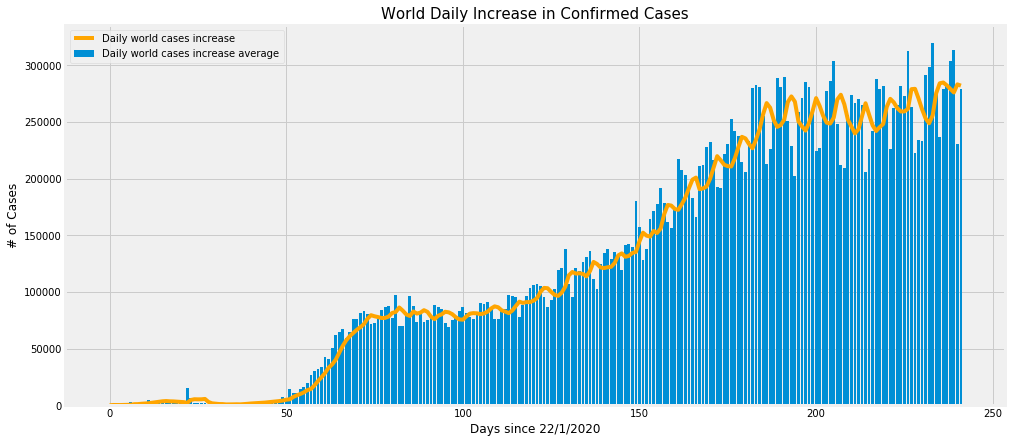

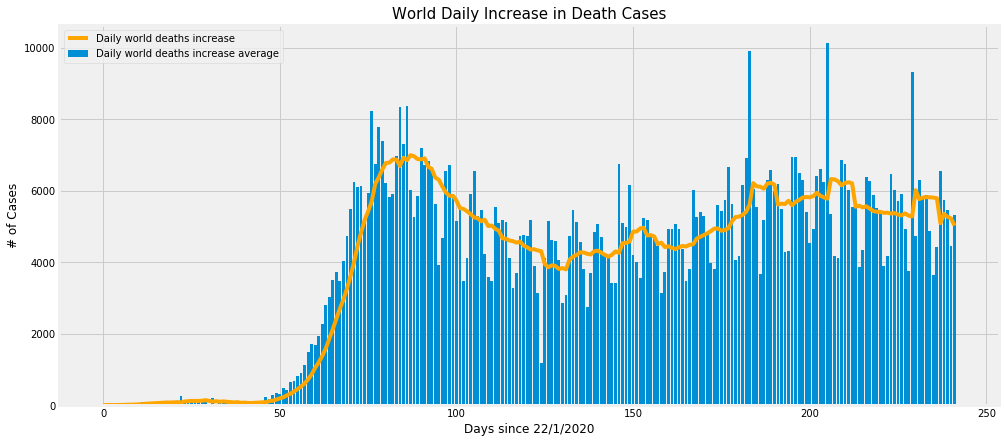

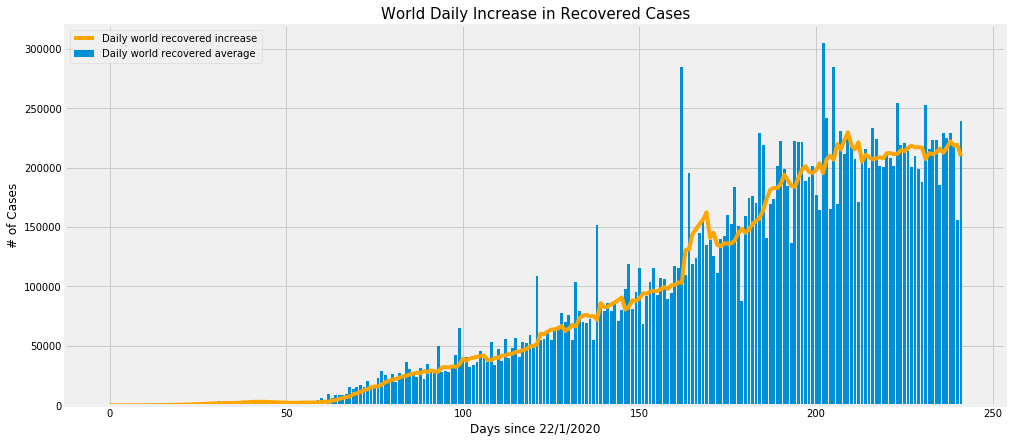

In [24]:
plt.figure(figsize = (15, 7))
plt.bar(days_since_1_22, daily_world_cases_increase)
plt.plot(days_since_1_22, daily_world_cases_increase_average, color = 'orange')
plt.xlabel('Days since 22/1/2020')
plt.title("World Daily Increase in Confirmed Cases", size = 15)
plt.ylabel('# of Cases')
plt.legend(['Daily world cases increase', 'Daily world cases increase average'])
plt.show()

plt.figure(figsize = (15, 7))
plt.bar(days_since_1_22, daily_world_deaths_increase)
plt.plot(days_since_1_22, daily_world_deaths_increase_average, color = 'orange')
plt.xlabel('Days since 22/1/2020')
plt.ylabel('# of Cases')
plt.title("World Daily Increase in Death Cases", size = 15)
plt.legend(['Daily world deaths increase', 'Daily world deaths increase average'])
plt.show()

plt.figure(figsize = (15, 7))
plt.bar(days_since_1_22, daily_world_recovered_increase)
plt.plot(days_since_1_22, daily_world_recovered_increase_average, color = 'orange')
plt.legend(['Daily world recovered increase', 'Daily world recovered average'])
plt.xlabel('Days since 22/1/2020')
plt.title("World Daily Increase in Recovered Cases", size = 15)
plt.ylabel('# of Cases')
plt.show()

In [25]:
 def country_viz(country):
    Country = country
    data = confirmed_df[confirmed_df['Country/Region']==Country]

    data = data.loc[:, columns[4]:columns[-1]]
    d = [data.loc[:, i].sum() for i in data.keys()]
    d_a = moving_average(d, window)
    d_i = daily_increase(d)
    d_i_a = moving_average(d_i, window)
    d  = np.array(d).reshape(-1, 1)
    d_a = np.array(d_a).reshape(-1, 1)
    d_i = np.array(d_i).reshape(1, -1)[0]
    d_i_a = np.array(d_i_a).reshape(1, -1)[0]
    
    plt.figure(figsize = (15, 7))
    plt.plot(days_since_1_22, d)
    plt.plot(days_since_1_22, d_a)
    plt.legend(['Total cases', 'Total cases average'])
    plt.title(Country)
    plt.xlabel('Days since 22/1/2020')
    plt.ylabel('# of Cases')
    plt.show()
    
    plt.figure(figsize = (15, 7))
    plt.bar(days_since_1_22, d_i.reshape(1, -1)[0])
    plt.plot(days_since_1_22, d_i_a.reshape(1, -1)[0], color = 'orange', linestyle = 'dashed')
    plt.legend(['Daily cases increase', 'Daily cases increase average'])
    plt.title(Country)
    plt.xlabel('Days since 22/1/2020')
    plt.ylabel('# of Cases')
    plt.show()
    
    d = death_df[death_df['Country/Region']==country]
    d = d.loc[:, columns[4]:columns[-1]]
    t_d = [d.loc[:, i].sum() for i in d.keys()]
    t_d_a = moving_average(t_d, window)
    d_d = daily_increase(t_d)
    d_d_a = moving_average(d_d, window)
    d_d = np.array(d_d).reshape(1, -1)[0]
    d_d_a = np.array(d_d_a).reshape(1, -1)[0]
    
    plt.figure(figsize = (15, 7))
    plt.bar(days_since_1_22, d_d)
    plt.plot(days_since_1_22, d_d_a, color = 'orange', linestyle = 'dashed')
    plt.legend(['Daily deaths', 'Daily deaths average'])
    plt.xlabel('Days since 22/1/2020')
    plt.ylabel('# of Cases')
    plt.title(country)
    plt.show()

    d = recoveries_df[recoveries_df['Country/Region']==country]
    d = d.loc[:, columns[4]:columns[-1]]
    t_d = [d.loc[:, i].sum() for i in d.keys()]
    t_d_a = moving_average(t_d, window)
    d_d = daily_increase(t_d)
    d_d_a = moving_average(d_d, window)
    d_d = np.array(d_d).reshape(1, -1)[0]
    d_d_a = np.array(d_d_a).reshape(1, -1)[0]
    
    plt.figure(figsize = (15, 7))
    plt.bar(days_since_1_22, d_d)
    plt.plot(days_since_1_22, d_d_a, color = 'orange', linestyle = 'dashed')
    plt.legend(['Daily recoveries', 'Daily recoverires average'])
    plt.xlabel('Days since 22/1/2020')
    plt.ylabel('# of Cases')
    plt.title(country)
    plt.show()

# Countrywise Graphs

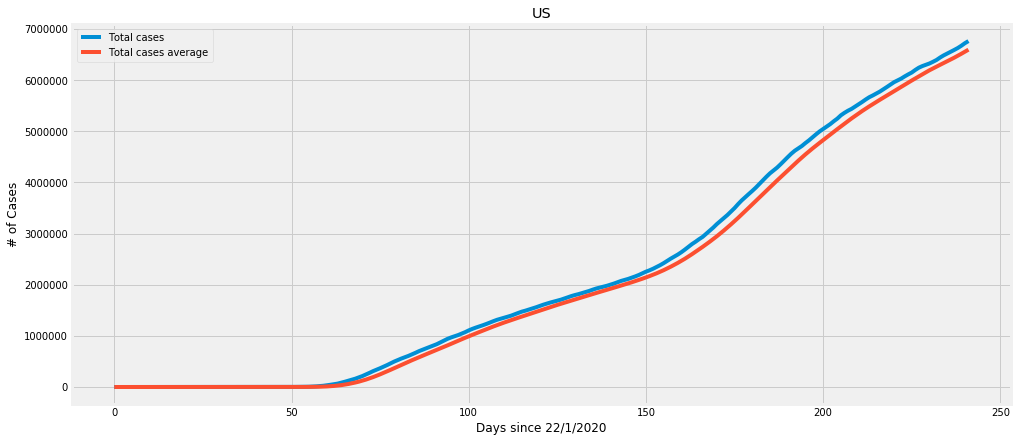

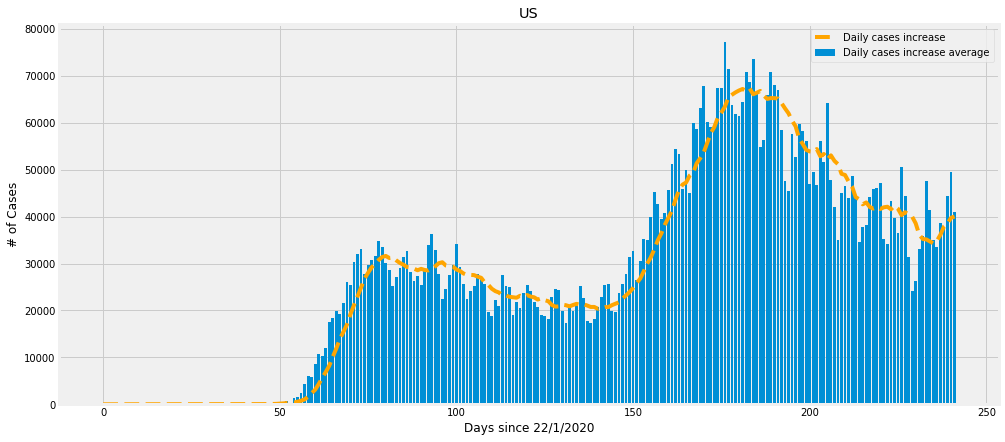

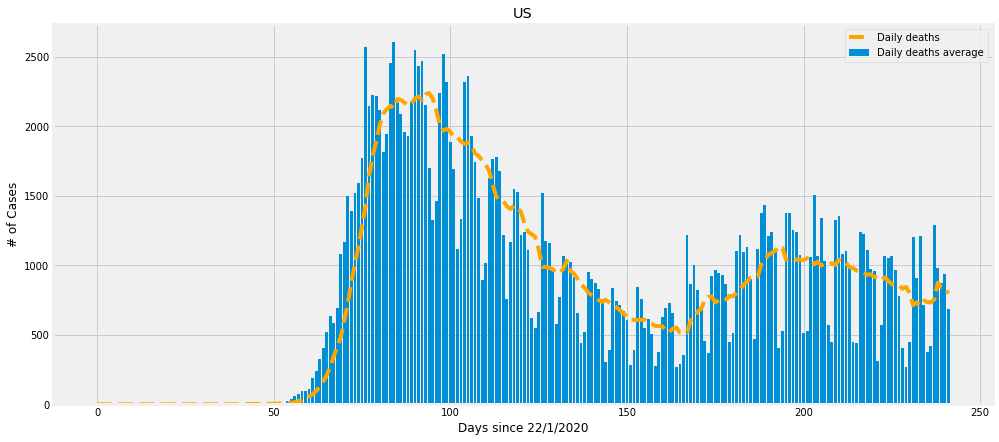

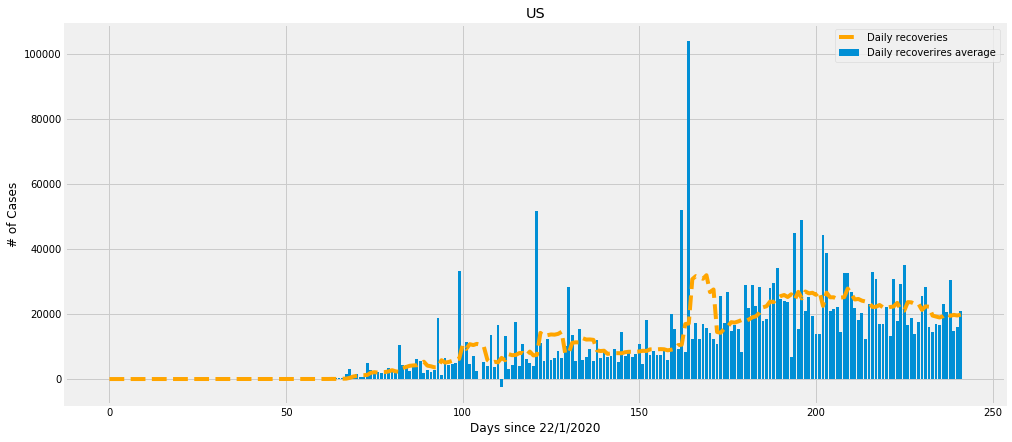

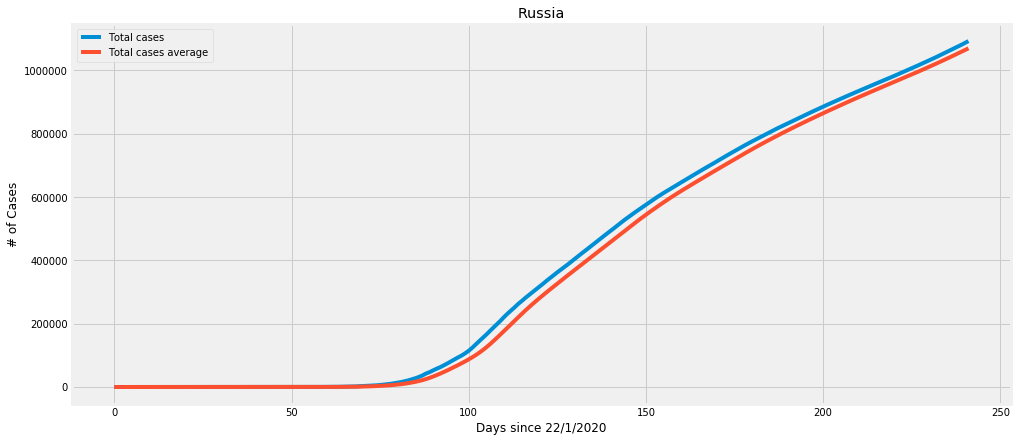

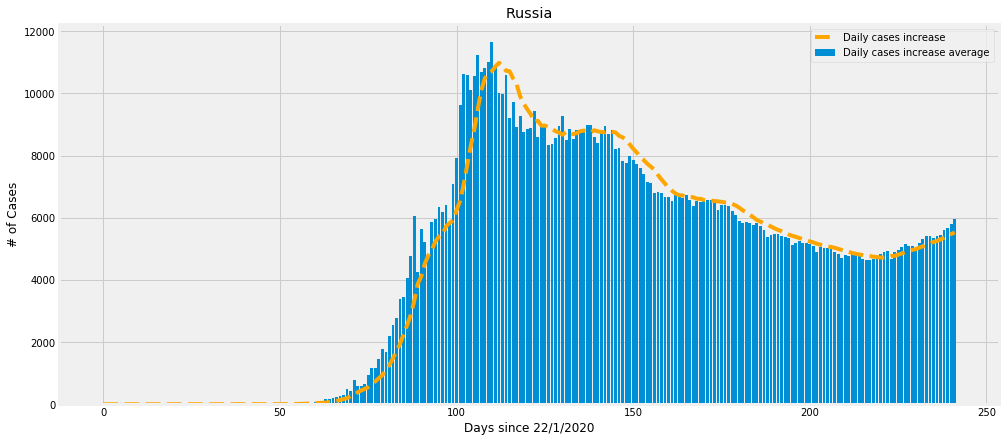

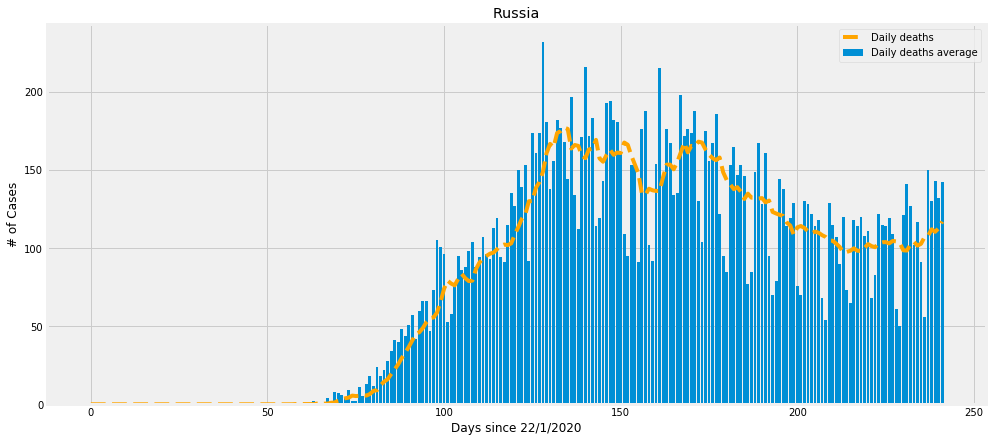

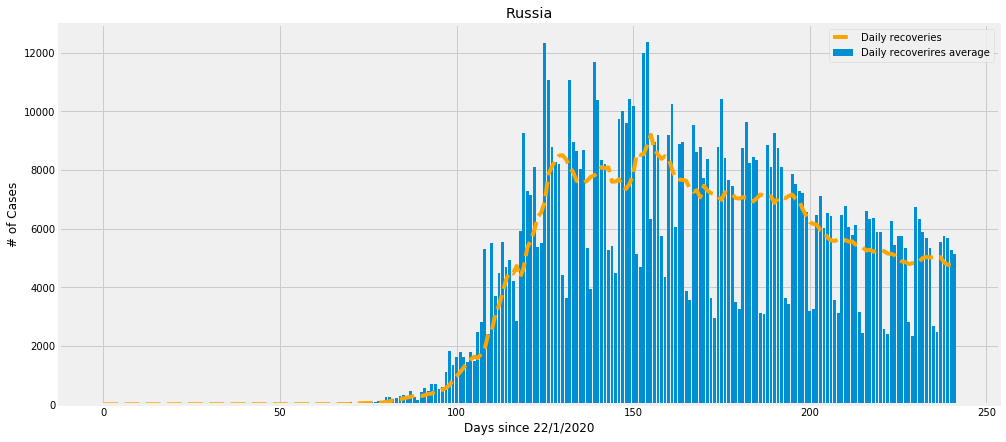

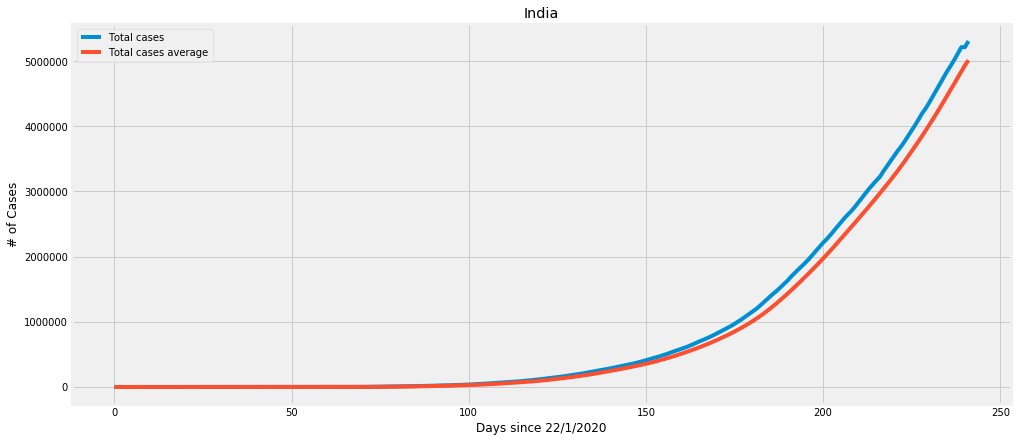

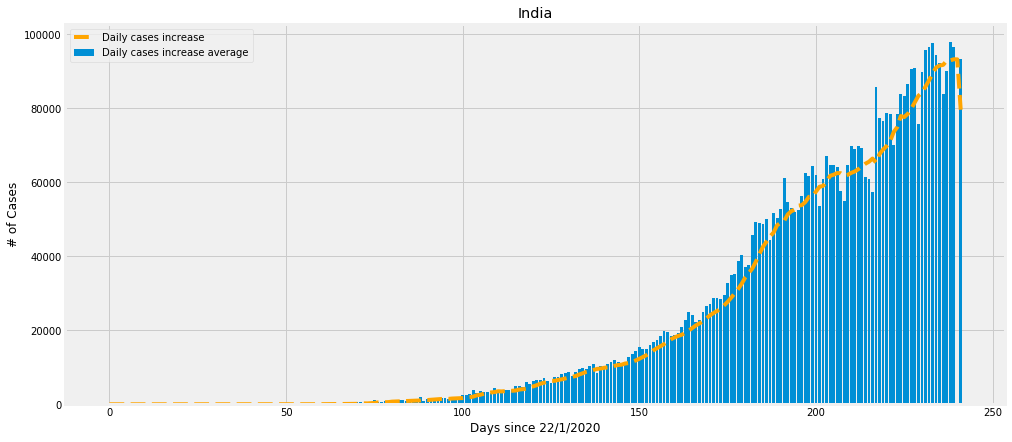

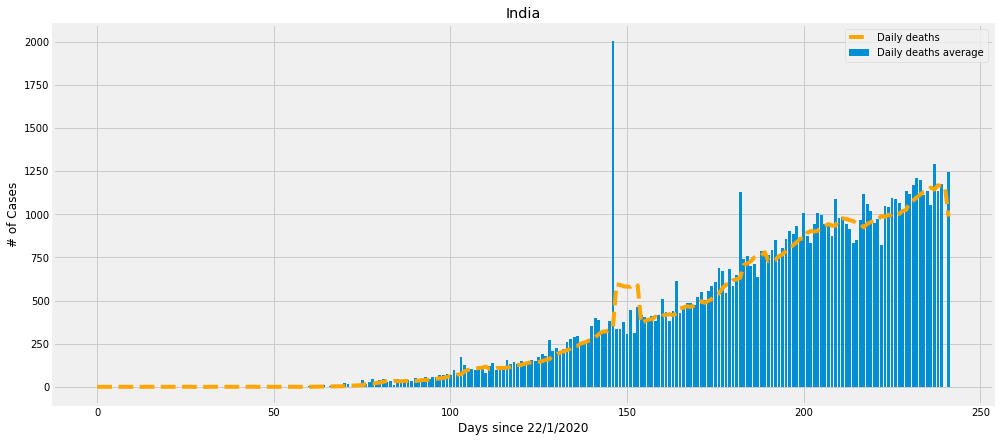

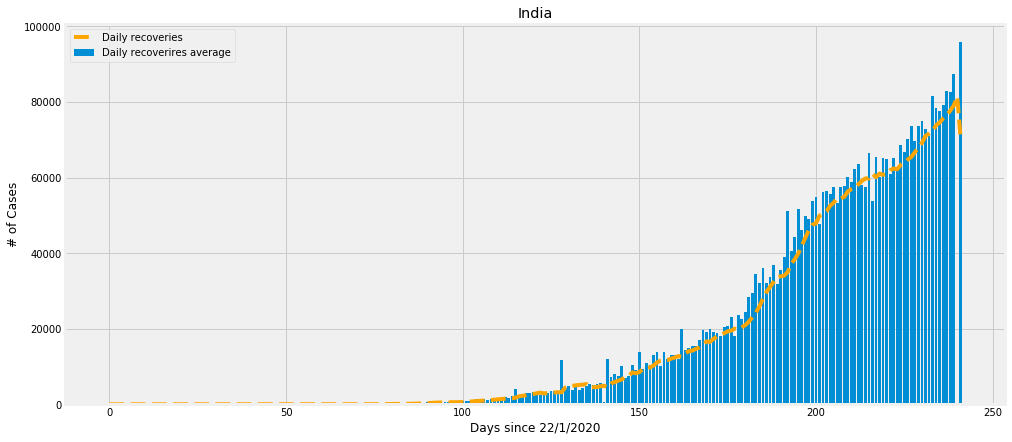

In [26]:
countries = ['US', 'Russia', 'India']
for i in countries:
    country_viz(i)

In [27]:
def country_comparision(get_data):
    
    plt.figure(figsize = (15, 7))
    for country in get_data:
        data = confirmed_df[confirmed_df['Country/Region']==country]
        data = data.loc[:, columns[4]:columns[-1]]
        d = [data.loc[:, i].sum() for i in data.keys()]
        d = np.array(d).reshape(1, -1)[0]
        plt.plot(days_since_1_22, d)
    plt.legend(get_data)
    plt.title('Total cases', size = 15)
    plt.xlabel('Days since 22/1/2020')
    plt.ylabel('# of Cases')
    plt.show()
    
    plt.figure(figsize = (15, 7))
    for country in get_data:
        data = death_df[death_df['Country/Region']==country]
        data = data.loc[:, columns[4]:columns[-1]]
        d = [data.loc[:, i].sum() for i in data.keys()]
        d = np.array(d).reshape(1, -1)[0]
        plt.plot(days_since_1_22, d)
    plt.legend(get_data)
    plt.title('Total Deaths', size = 15)
    plt.xlabel('Days since 22/1/2020')
    plt.ylabel('# of Cases')
    plt.show()
    
    plt.figure(figsize = (15, 7))
    for country in get_data:
        data = recoveries_df[recoveries_df['Country/Region']==country]
        data = data.loc[:, columns[4]:columns[-1]]
        d = [data.loc[:, i].sum() for i in data.keys()]
        d = np.array(d).reshape(1, -1)[0]
        plt.plot(days_since_1_22, d)
    plt.legend(get_data)
    plt.title('Recoveries', size = 15)
    plt.xlabel('Days since 22/1/2020')
    plt.ylabel('# of Cases')
    plt.show()

# Graphs Comparing Countries

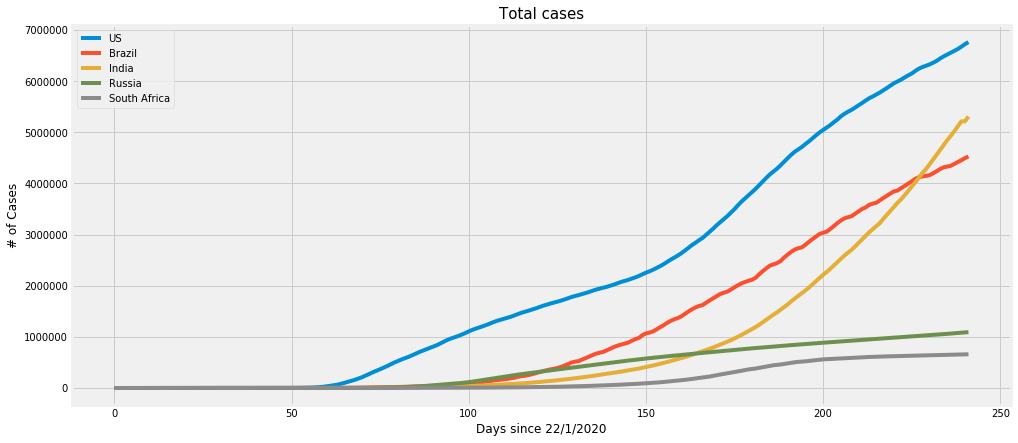

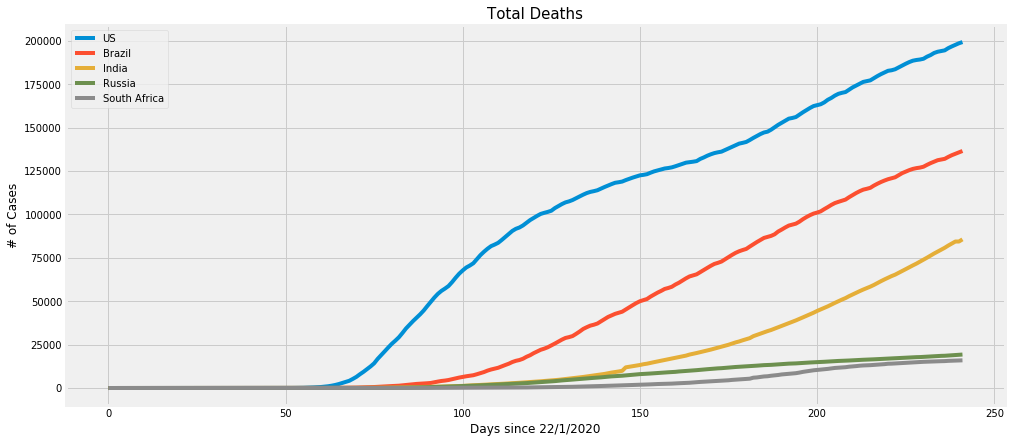

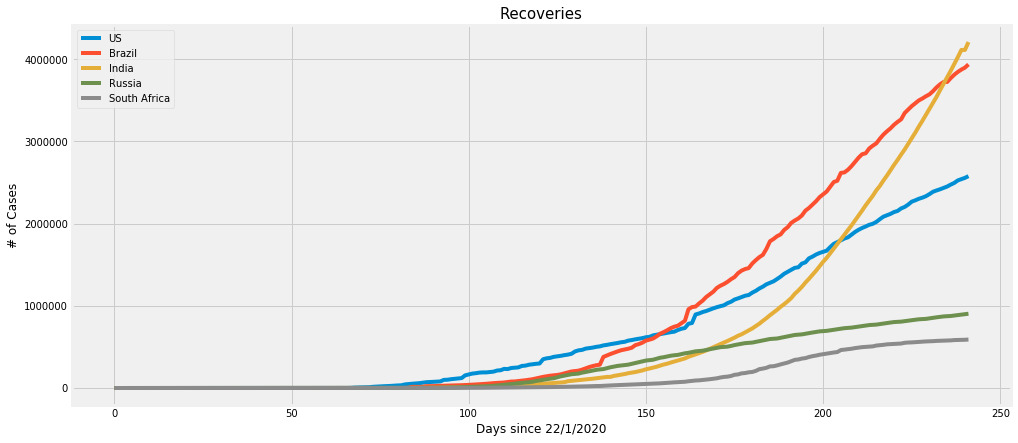

In [28]:
compare_countries = ['US', 'Brazil', 'India', 'Russia', 'South Africa'] 
country_comparision(compare_countries)

Prediction for Future Days

In [29]:
predicted = bayesian_best.predict(poly_features.fit_transform(np.array(list(range(len(future_forecast)))).reshape(-1, 1))).reshape(-1, 1)

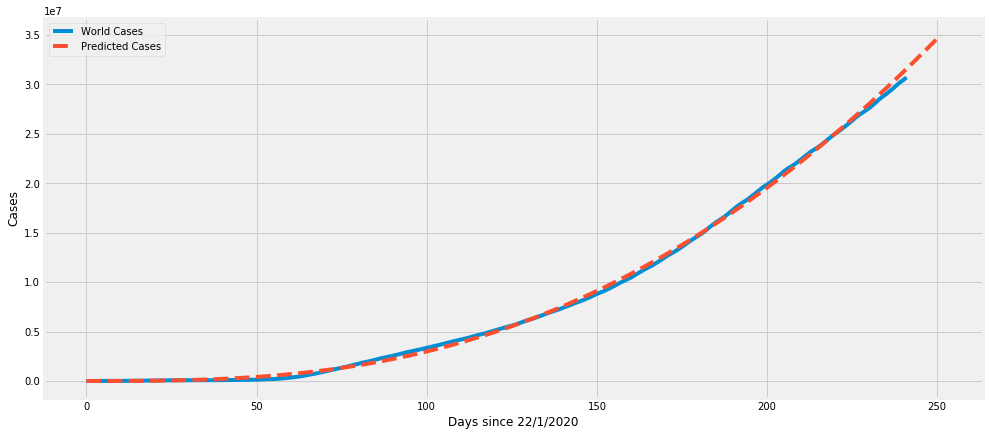

In [30]:
plt.figure(figsize = (15, 7))
plt.plot(world_cases)
plt.plot(predicted, linestyle = 'dashed')
plt.xlabel("Days since 22/1/2020")
plt.ylabel("Cases")
plt.legend(["World Cases", "Predicted Cases"])

In [31]:
prediction_df = pd.DataFrame({"Dates":future_forecast[-10:], "Predicted_Cases":np.round(predicted[-10:].reshape(1, -1)[0])})
prediction_df.style.background_gradient(cmap = 'Reds')

,Dates,Predicted_Cases
0,09/20/2020,31882011.000000
1,09/21/2020,32216818.000000
2,09/22/2020,32553536.000000
3,09/23/2020,32892167.000000
4,09/24/2020,33232710.000000
5,09/25/2020,33575167.000000
6,09/26/2020,33919538.000000
7,09/27/2020,34265825.000000
8,09/28/2020,34614027.000000
9,09/29/2020,34964147.000000


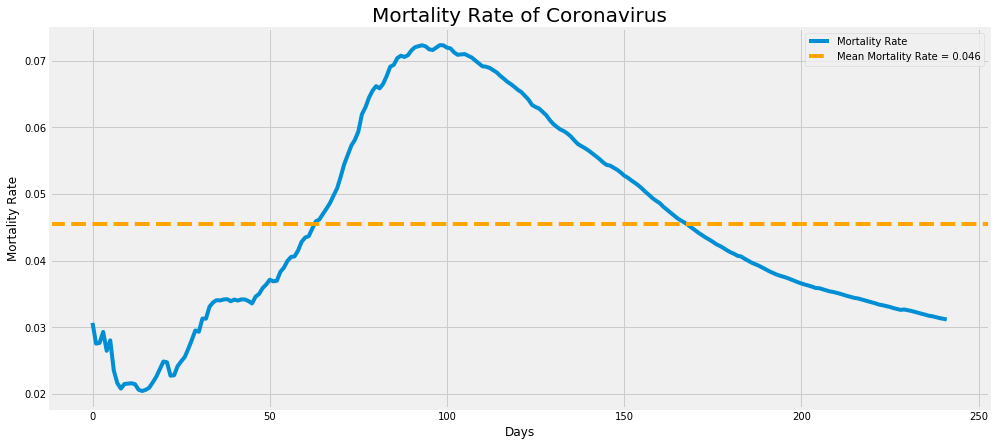

In [32]:
plt.figure(figsize = (15, 7))
plt.plot(mortality_rate)
plt.axhline(y = np.mean(mortality_rate), linestyle = '--', color = 'orange')
plt.xlabel("Days")
plt.ylabel("Mortality Rate")
plt.title('Mortality Rate of Coronavirus', size = 20)
plt.legend(["Mortality Rate", "Mean Mortality Rate = "+str(round(np.mean(mortality_rate), 3))])
plt.show()

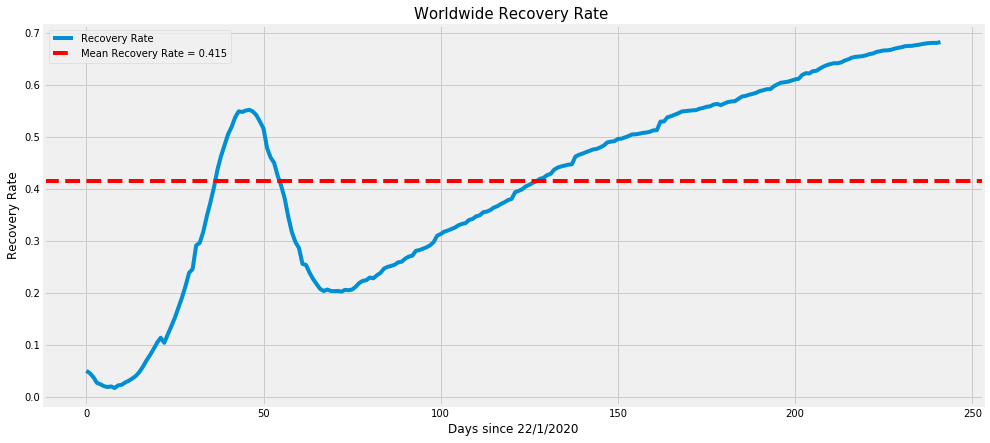

In [33]:
#Recovery Rate
recovery_rate = world_recovered/world_cases

plt.figure(figsize = (15, 7))
plt.plot(recovery_rate.reshape(1, -1)[0])
plt.axhline(y = np.mean(recovery_rate.reshape(1, -1)[0]), linestyle = '--', color = 'red')
plt.xlabel('Days since 22/1/2020')
plt.ylabel('Recovery Rate')
plt.title("Worldwide Recovery Rate ", size = 15)
plt.legend(['Recovery Rate', 'Mean Recovery Rate = '+str(round(np.mean(recovery_rate.reshape(1, -1)[0]), 3))])
plt.show()

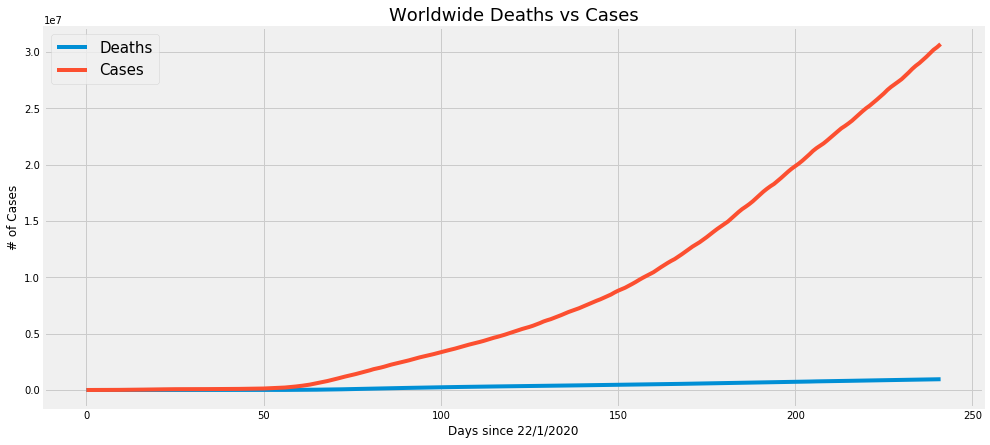

In [34]:
plt.figure(figsize = (15, 7))
plt.plot(world_deaths)
plt.plot(world_cases)
plt.xlabel('Days since 22/1/2020')
plt.ylabel('# of Cases')
plt.title("Worldwide Deaths vs Cases", size = 18)
plt.legend(['Deaths', 'Cases'], fontsize = 15)
plt.show()

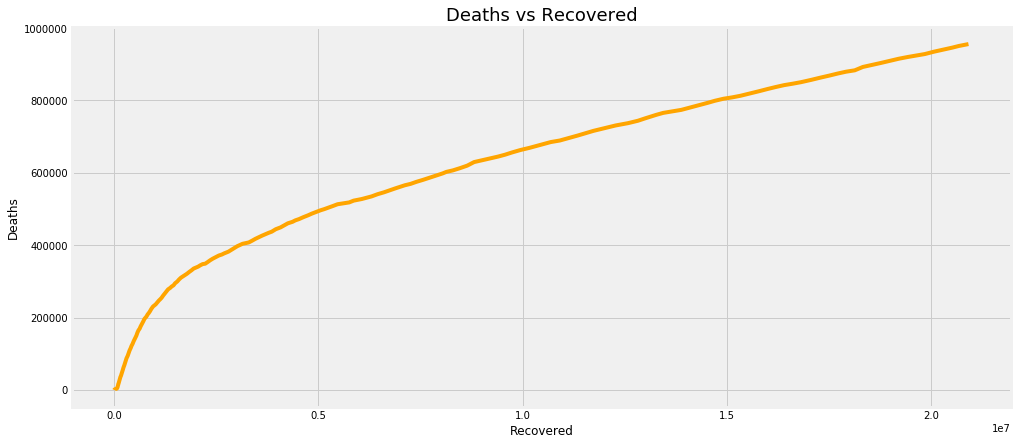

In [35]:
plt.figure(figsize = (15, 7))
plt.plot(world_recovered, world_deaths, color = 'orange')
plt.xlabel('Recovered')
plt.ylabel('Deaths')
plt.title("Deaths vs Recovered", size = 18)
plt.show()

In [36]:
unique_countries = list(latest_df["Country_Region"].unique())
countries_cases = []

for i in unique_countries:
    countries_cases.append(latest_df[latest_df['Country_Region']==i]['Confirmed'].sum())

In [37]:
unique_countries_sorted = [c for c, k in sorted(zip(unique_countries, countries_cases), key = operator.itemgetter(1), reverse = True)]

countries_cases = []
countries_deaths = []
countries_recovered = []
countries_active_cases = []
countries_mortality_rate = []
for i in unique_countries_sorted:
    countries_cases.append(latest_df[latest_df['Country_Region']==i]['Confirmed'].sum())
    countries_deaths.append(latest_df[latest_df['Country_Region']==i]['Deaths'].sum())
    countries_recovered.append(latest_df[latest_df['Country_Region']==i]['Recovered'].sum())
    countries_active_cases.append(latest_df[latest_df['Country_Region']==i]['Active'].sum())
    countries_mortality_rate.append(countries_deaths[-1]/countries_cases[-1])    

# Countrywise Data Table

In [38]:
countries_df  = pd.DataFrame({
    'Name of Country': unique_countries_sorted, 'Total Cases': countries_cases,
    'Total Deaths': countries_deaths, 'Total Active Cases': countries_active_cases,
    'Total Recovered': countries_recovered,'Mortality Rate': countries_mortality_rate
                            })
countries_df.style.background_gradient(cmap = 'Reds')

,Name of Country,Total Cases,Total Deaths,Total Active Cases,Total Recovered,Mortality Rate
0,US,6723933,198570,3968780.000000,2556465,0.029532
1,India,5214677,84372,1017754.000000,4112551,0.016180
2,Brazil,4495183,135793,461851.000000,3897539,0.030209
3,Russia,1086955,19128,169407.000000,898420,0.017598
4,Colombia,750471,23665,111349.000000,615457,0.031534
5,Peru,750098,31146,124439.000000,594513,0.041523
6,Mexico,688954,72803,34042.000000,582109,0.105672
7,South Africa,657627,15857,54926.000000,586844,0.024112
8,Spain,640040,30495,459169.000000,150376,0.047645
9,Argentina,613658,12656,133716.000000,467286,0.020624


In [39]:
unique_province = list(latest_df["Province_State"].unique())

#Removing NaN Values
unique_province = [i for i in unique_province if str(i)!= 'nan']

province_cases = []
for i in unique_province:
    province_cases.append(latest_df[latest_df['Province_State']==i]['Confirmed'].sum())

In [40]:
unique_province_sorted = [c for c, k in sorted(zip(unique_province, province_cases), key = operator.itemgetter(1), reverse = True)]

In [41]:
province_cases = []
country = []
province_deaths = []
province_recovered = []
province_active_cases = []
province_mortality_rate = []
for i in unique_province_sorted:
    province_cases.append(latest_df[latest_df['Province_State']==i]['Confirmed'].sum())
    country.append(latest_df[latest_df['Province_State']==i]['Country_Region'].unique()[0])
    province_deaths.append(latest_df[latest_df['Province_State']==i]['Deaths'].sum())
    province_recovered.append(latest_df[latest_df['Province_State']==i]['Recovered'].sum())
    province_active_cases.append(latest_df[latest_df['Province_State']==i]['Active'].sum())
    province_mortality_rate.append(province_deaths[-1]/province_cases[-1])    

# Province/State wise Data Table

In [42]:
limit = 150
province_df = pd.DataFrame({
    'Province': unique_province_sorted[:limit],
    'Country' : country[:limit],
    'Total Cases' : province_cases[:limit],
    'Deaths' : province_deaths[:limit],
    'Recovered' : province_recovered[:limit],
    'Active Cases' : province_active_cases[:limit],
    'Mortality Rate' : province_mortality_rate[:limit]
                           })
province_df.style.background_gradient(cmap = 'Oranges')

,Province,Country,Total Cases,Deaths,Recovered,Active Cases,Mortality Rate
0,Maharashtra,India,1145840,31351,812354,302135.000000,0.027361
1,Sao Paulo,Brazil,924532,33678,770664,120190.000000,0.036427
2,California,US,779491,14893,0,764598.000000,0.019106
3,Texas,US,704563,14951,0,689612.000000,0.021220
4,Florida,US,677660,13225,0,664435.000000,0.019516
5,Andhra Pradesh,India,601462,5177,508088,88197.000000,0.008607
6,Tamil Nadu,India,525420,8618,470192,46610.000000,0.016402
7,Karnataka,India,494356,7629,383077,103650.000000,0.015432
8,New York,US,448052,33085,0,414967.000000,0.073842
9,Lima,Peru,346553,13936,0,332617.000000,0.040213


In [43]:
us_confirmed_cases = []
us_states = []

us_states  = us_medical_data_df['Province_State'].unique()
for i in us_states:
    us_confirmed_cases.append(us_medical_data_df[us_medical_data_df['Province_State'] == i]['Confirmed'].sum())

In [44]:
us_states_sorted = [c for c, x in sorted(zip(us_states, us_confirmed_cases), key = operator.itemgetter(1), reverse = True)]

us_confirmed_cases = []
us_deaths = []
us_active_cases = []
us_mortality_rate = []
for i in us_states_sorted:
    us_confirmed_cases.append(us_medical_data_df[us_medical_data_df['Province_State'] == i]['Confirmed'].sum())
    us_deaths.append(us_medical_data_df[us_medical_data_df['Province_State'] == i]['Deaths'].sum())
    us_active_cases.append(us_medical_data_df[us_medical_data_df['Province_State'] == i]['Active'].sum())
    us_mortality_rate.append(us_medical_data_df[us_medical_data_df['Province_State'] == i]['Mortality_Rate'].sum())

# Data Table for USA

In [45]:
us_df = pd.DataFrame({
    'State' : us_states_sorted,
    'Total Cases' : us_confirmed_cases,
    'Deaths' : us_deaths,
    'Acitve cases' : us_active_cases,
    'Mortality Rate' : us_mortality_rate
        })

us_df.style.background_gradient(cmap = 'Reds')

,State,Total Cases,Deaths,Acitve cases,Mortality Rate
0,California,779491,14893,764598.000000,1.910606
1,Texas,704563,14951,88950.000000,2.122025
2,Florida,677660,13225,664435.000000,1.951569
3,New York,448052,33085,338931.000000,7.384188
4,Georgia,302854,6536,296318.000000,2.158136
5,Illinois,272517,8647,263870.000000,3.173013
6,Arizona,212942,5451,173965.000000,2.559852
7,New Jersey,198848,16061,148215.000000,8.077024
8,North Carolina,190973,3207,20509.000000,1.679295
9,Tennessee,180497,2196,15120.000000,1.216641


In [46]:
india_cases = latest_df[latest_df['Country_Region'] == 'India']['Confirmed'].sum()
outside_india_cases = latest_df['Confirmed'].sum() - india_cases

India vs Other Part of World

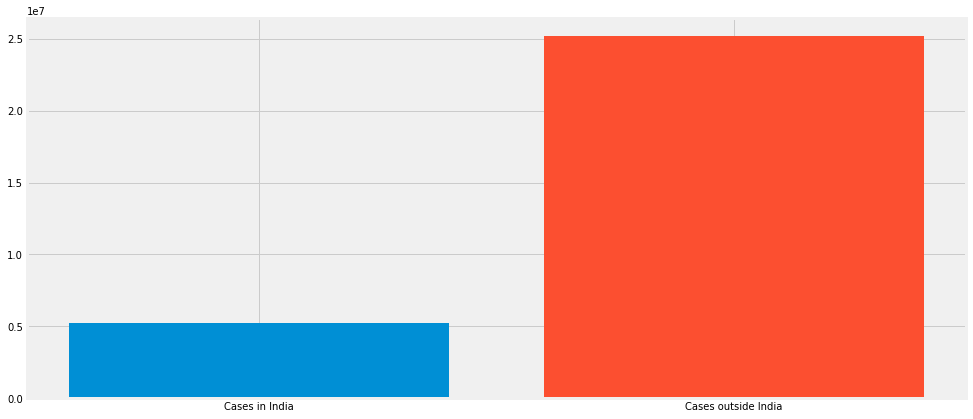

In [47]:
plt.figure(figsize = (15, 7))
plt.bar('Cases in India', india_cases)
plt.bar('Cases outside India', outside_india_cases)
plt.show()

In [48]:
number_of_countries = 10
top_countries = unique_countries_sorted[:number_of_countries]
top_countries_cases = countries_cases[:number_of_countries]

In [49]:
def top_countries_plot(countries, cases):
    plt.figure(figsize = (15, 7))
    for i, j in zip(countries, cases):
        plt.bar(i, j)
    plt.bar('Others', sum(countries_cases) - sum(cases))
    plt.show()

# Bar and Pie Chart Visualization

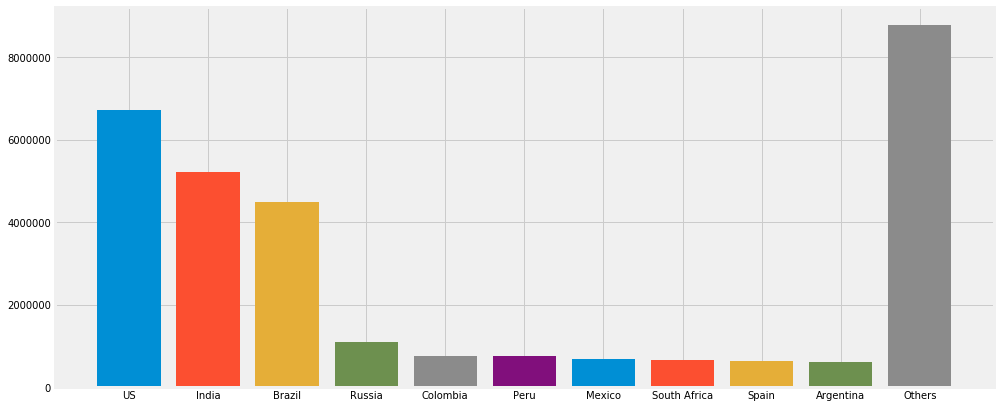

In [50]:
top_countries_plot(top_countries, top_countries_cases)

In [51]:
number_of_province = 10
top_province = unique_province_sorted[:number_of_province]
top_province_cases = province_cases[:number_of_province]

def top_province_plot(province, cases):
    plt.figure(figsize = (15, 7))
    for i, j in zip(province, cases):
        plt.bar(i, j)
    plt.show()

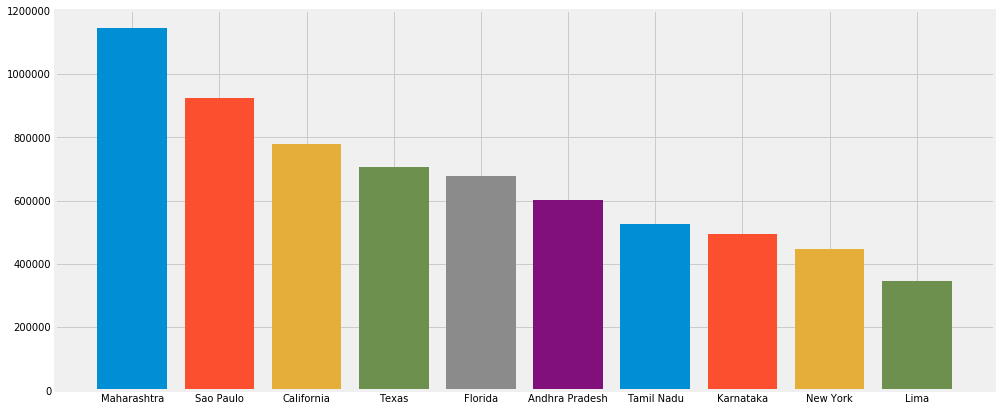

In [52]:
top_province_plot(top_province, top_province_cases)

In [53]:
def pie_chart(country, cases):
    plt.figure(figsize = (10, 10))
    plt.pie(cases, shadow = True, labels = country)

#Include Other Countries as one
top_countries.append('Others')
top_countries_cases.append(sum(countries_cases) - sum(top_countries_cases))

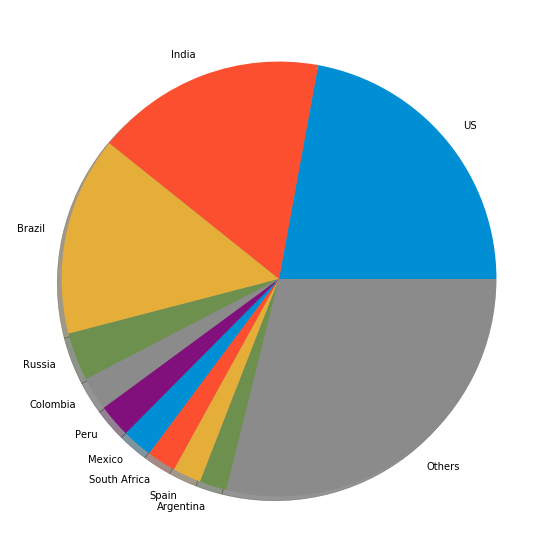

In [54]:
pie_chart(top_countries, top_countries_cases)

In [55]:
#Include Other Provinces/States as one
top_province.append('Others')
top_province_cases.append(sum(province_cases) - sum(top_province_cases))

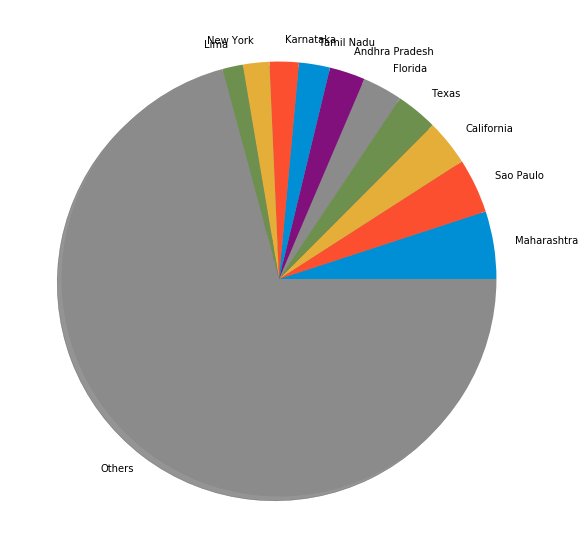

In [56]:
pie_chart(top_province, top_province_cases)

In [57]:
def country_pie_chart(country):
    provinces = list(latest_df[latest_df['Country_Region'] == country]['Province_State'].unique())
    cases = []
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise']
    for i in provinces:
        cases.append(latest_df[latest_df['Province_State'] == i]['Confirmed'].sum())
    provinces1 = []
    provinces1 = [c for c, x in sorted(zip(provinces, cases), key = operator.itemgetter(1), reverse = True)]
    cases = []
    for i in provinces1:
        cases.append(latest_df[latest_df['Province_State'] == i]['Confirmed'].sum())
    total = sum(cases)
    if(len(provinces1) > 7):
        provinces1 = provinces1[:7]
        cases = cases[:7]
        provinces1.append('Others')
        cases.append(total - sum(cases))
    plt.figure(figsize = (10, 10))
    plt.pie(cases, colors = c)
    plt.legend(provinces1)
    plt.title(country, size = 25)
    plt.show()

Individual Country Pie Chart Visualization

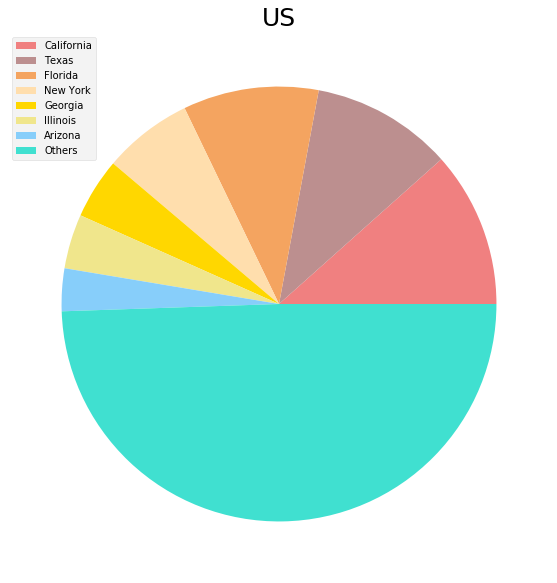

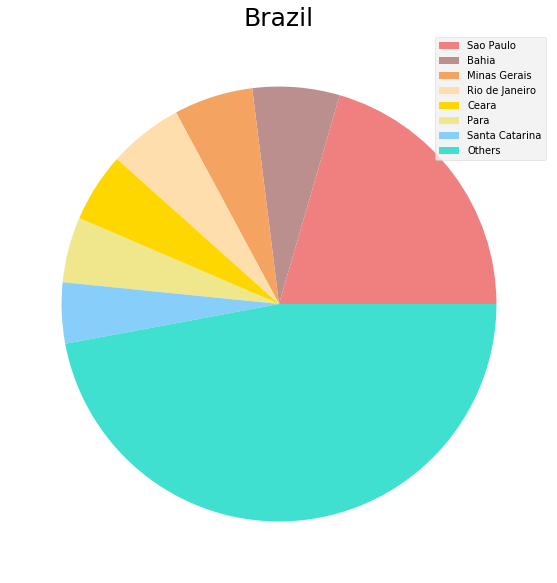

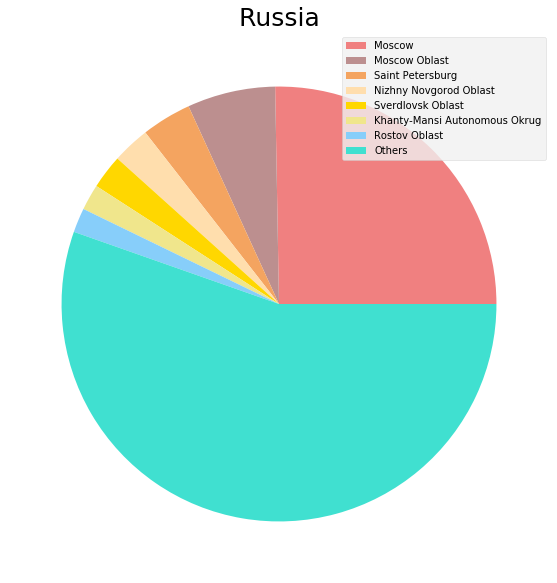

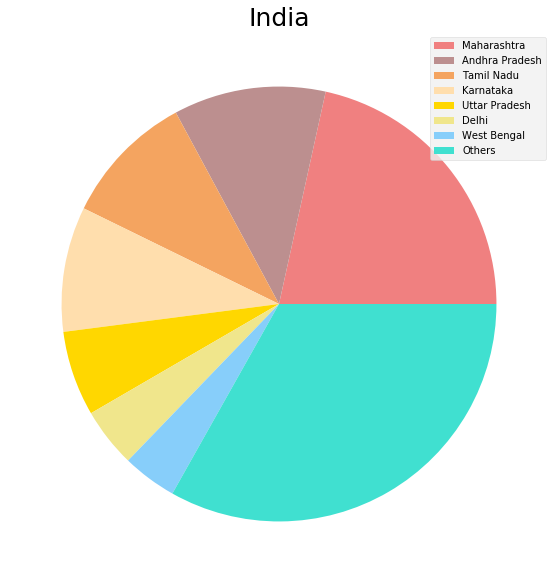

In [58]:
pie_chart_countries = ['US', 'Brazil', 'Russia', 'India']
for i in pie_chart_countries:                       
    country_pie_chart(i)

Import Mobility Data from csv file

In [59]:
mobility_df = pd.read_csv('mobility.csv')
mobility_df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,171.18,171.54,166.72,175.48,186.57,173.76,142.75,144.04,135.62,140.86
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,158.68,175.61,163.28,175.05,169.85,154.67,159.40,157.19,160.34,161.07
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,57.93,59.49,63.20,77.16,69.70,42.75,55.70,57.94,61.09,66.01
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,46.40,46.81,50.76,57.64,53.04,34.87,44.74,44.54,50.38,56.07
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,87.65,89.93,96.29,98.60,83.67,85.82,89.24,93.18,95.04,101.92


In [60]:
def mobility_vs_daily_increase(country):
    
    df = confirmed_df[confirmed_df['Country/Region'] == country]
    columns = df.keys()
    columns = columns[4:]
    data = []
    for i in columns:
        data.append(df[i].sum())
    
    plt.figure(figsize = (15, 7))
    plt.bar(range(len(columns)), daily_increase(data))
    plt.plot(moving_average(daily_increase(data)), linestyle = '--', color = 'red')
    plt.title('Daily Cases Increase in {}'.format(country), size = 20)
    plt.xlabel("Days since 22/1/2020")
    plt.ylabel("# of Cases")
    plt.show()
    
    df = mobility_df[mobility_df['region'] == country]
    columns = df.keys()
    columns = columns[6:]
    country_mobility = []
    for i in columns:
        country_mobility.append(df[i].sum())
    
    plt.figure(figsize = (15, 7))
    plt.bar(range(len(columns)), country_mobility)
    plt.plot(moving_average(country_mobility), linestyle = '--', color = 'red')
    plt.title('Mobility', size = 20)
    plt.legend(['Average Mobility'])
    plt.xlabel("Days since 22/1/2020")
    plt.ylabel("Mobility")
    plt.show()

# Comparision of Increase in Cases with the Mobility of Country 

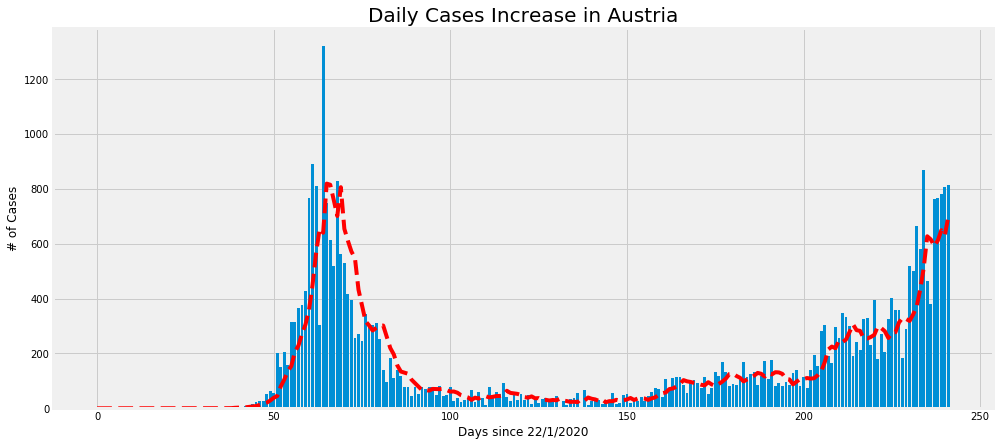

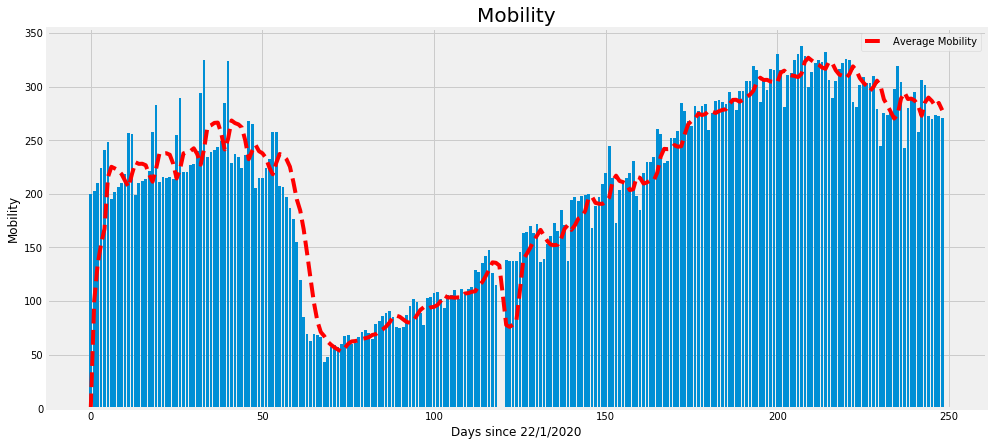

In [61]:
country = 'Austria'
mobility_vs_daily_increase(country)

## The End ##